In [1]:
import pandas as pd
import numpy as np

In [2]:
combined_df=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\MAJOR_PROJECT\\NEW_FILES\\file.csv")

In [3]:
row_count, column_count = combined_df.shape
print("Row count:", row_count)
print("Column count:", column_count)

Row count: 423385
Column count: 73


In [4]:
label_distribution = combined_df['Label'].value_counts()
print("\nLabel Distribution:")
print(label_distribution)


Label Distribution:
VOIP             410848
P2P                6769
CHAT               3609
STREAMING          1663
EMAIL               333
FILE TRANSFER       163
Name: Label, dtype: int64


In [5]:
# List all column names
column_names = combined_df.columns.tolist()
print("Column names:", column_names)

Column names: ['frame.len', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'udp.srcport', 'udp.dstport', 'tcp.seq', 'frame.time_epoch', 'tcp.stream', 'ip.flags.df', 'frame.encap_type', 'frame.cap_len', 'frame.marked', 'eth.lg', 'eth.ig', 'ip.dsfield.dscp', 'ip.flags.rb', 'ip.flags.mf', 'frame.time_relative', 'ip.len', 'tcp.len', 'udp.length', 'frame.time_delta', 'ip.hdr_len', 'tcp.hdr_len', 'tcp.analysis.bytes_in_flight', 'tcp.time_relative', 'tcp.time_delta', 'tcp.analysis.ack_rtt', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.fin', 'tcp.flags.urg', 'ip.frag_offset', 'ip.ttl', 'tcp.ack', 'tcp.window_size', 'tcp.flags.cwr', 'tcp.window_size_value', 'tcp.urgent_pointer', 'tcp.options.nop', 'tcp.analysis.bytes_in_flight.1', 'tcp.analysis.push_bytes_sent', 'icmp.type', 'icmp.code', 'icmp.ident', 'icmp.seq', 'http.content_length', 'data.len', 'dns.flags.response', 'dns.flags.opcode', 'dns.count.queries', 'dns.count.answers', 'dns.resp.ttl', 'dns.resp.len', '

In [6]:
# Number of entries in each column
entries_per_column = combined_df.count()
print("\nNumber of entries in each column:")
print(entries_per_column)


Number of entries in each column:
frame.len                         423385
ip.proto                          423385
tcp.srcport                            0
tcp.dstport                            0
udp.srcport                       423385
                                   ...  
tcp.analysis.window_update             0
tcp.analysis.zero_window               0
tcp.analysis.zero_window_probe         0
frame.cap_len.1                   423385
Label                             423385
Length: 73, dtype: int64


In [7]:
# Missing values in each column
missing_values_per_column = combined_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values_per_column)



Missing values in each column:
frame.len                              0
ip.proto                               0
tcp.srcport                       423385
tcp.dstport                       423385
udp.srcport                            0
                                   ...  
tcp.analysis.window_update        423385
tcp.analysis.zero_window          423385
tcp.analysis.zero_window_probe    423385
frame.cap_len.1                        0
Label                                  0
Length: 73, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D,Dropout
#from keras.preprocessing.text import Tokenizer
#from keras.utils.np_utils import to_categorical

In [9]:
# Assuming combined_df is your DataFrame containing the data
voip_packets = combined_df[combined_df['Label'] == 'VOIP'].head(1000)
p2p_packets = combined_df[combined_df['Label'] == 'P2P'].head(1000)

remaining_packets = combined_df[(combined_df['Label'] != 'VOIP') & (combined_df['Label'] != 'P2P') ]

# Concatenate the first 2000 VOIP packets, 2000 P2P packets, and the remaining packets
final_dataset = pd.concat([voip_packets, p2p_packets, remaining_packets], ignore_index=True)
print(final_dataset.shape)

(7768, 73)


In [10]:
# List all column names
column_names = combined_df.columns.tolist()
print("Column names:", column_names)

Column names: ['frame.len', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'udp.srcport', 'udp.dstport', 'tcp.seq', 'frame.time_epoch', 'tcp.stream', 'ip.flags.df', 'frame.encap_type', 'frame.cap_len', 'frame.marked', 'eth.lg', 'eth.ig', 'ip.dsfield.dscp', 'ip.flags.rb', 'ip.flags.mf', 'frame.time_relative', 'ip.len', 'tcp.len', 'udp.length', 'frame.time_delta', 'ip.hdr_len', 'tcp.hdr_len', 'tcp.analysis.bytes_in_flight', 'tcp.time_relative', 'tcp.time_delta', 'tcp.analysis.ack_rtt', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.fin', 'tcp.flags.urg', 'ip.frag_offset', 'ip.ttl', 'tcp.ack', 'tcp.window_size', 'tcp.flags.cwr', 'tcp.window_size_value', 'tcp.urgent_pointer', 'tcp.options.nop', 'tcp.analysis.bytes_in_flight.1', 'tcp.analysis.push_bytes_sent', 'icmp.type', 'icmp.code', 'icmp.ident', 'icmp.seq', 'http.content_length', 'data.len', 'dns.flags.response', 'dns.flags.opcode', 'dns.count.queries', 'dns.count.answers', 'dns.resp.ttl', 'dns.resp.len', '

In [11]:
# Define a list of unwanted column names
#unwanted_columns = ['frame.len', 'tcp.seq','tcp.flags.syn','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset',\
                   #'data.len','udp.length.bad','udp.length.bad_zero']  # Add all unwanted column names here

    
unwanted_columns = ['frame.len','tcp.flags.syn','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset','data.len']  # Add all unwanted column names here
# Remove unwanted columns from the DataFrame
filtered_df = final_dataset.drop(columns=unwanted_columns)

# Display the filtered DataFrame
print(filtered_df)


      ip.proto  tcp.srcport  tcp.dstport  udp.srcport  udp.dstport  tcp.seq  \
0           17          NaN          NaN      28156.0         53.0      NaN   
1           17          NaN          NaN      28156.0         53.0      NaN   
2           17          NaN          NaN      28156.0         53.0      NaN   
3           17          NaN          NaN         53.0      28156.0      NaN   
4           17          NaN          NaN         53.0      28156.0      NaN   
...        ...          ...          ...          ...          ...      ...   
7763        17          NaN          NaN        443.0      51753.0      NaN   
7764        17          NaN          NaN      51753.0        443.0      NaN   
7765        17          NaN          NaN      34134.0         53.0      NaN   
7766        17          NaN          NaN      34134.0         53.0      NaN   
7767        17          NaN          NaN         53.0      34134.0      NaN   

      frame.time_epoch  tcp.stream  ip.flags.df  fr

In [12]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Label' column
filtered_df['Label'] = label_encoder.fit_transform(filtered_df['Label'])

 # Display the encoded labels
print("Encoded Labels:")
print(filtered_df['Label'].value_counts())


Encoded Labels:
0    3609
4    1663
5    1000
3    1000
1     333
2     163
Name: Label, dtype: int64


In [13]:
# Mapping original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'CHAT': 0, 'EMAIL': 1, 'FILE TRANSFER': 2, 'P2P': 3, 'STREAMING': 4, 'VOIP': 5}


In [14]:
X = filtered_df.drop(columns=['Label'])
y = filtered_df['Label']


In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
num_classes = len(encoder.classes_)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(6214, 66)
(6214,)


In [17]:
from sklearn.impute import SimpleImputer

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)

In [18]:
x_training_data = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(x_training_data.shape)


(6214, 28, 1)


# CNN-RNN

In [19]:
import time
import psutil
import os

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define input shape based on your data
input_shape = (x_training_data.shape[1], 1)  # Shape of your input data assuming it's sequential

# Define the number of classes for the output
num_classes = 6  # Assuming you have 6 classes for the output


# get the start time
#start_wall_time = time.time()
#start_cpu_time = time.process_time()


# Create the combined RNN-CNN model
model = Sequential([
    # CNN layers
    Conv1D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    #Flatten(),

    # RNN layers
    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64),
    Dropout(0.2),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train, epochs=75, batch_size=24, validation_data=(X_test, y_test),callbacks=[early_stopping])

# get the end time
#end_wall_time = time.time()
#end_cpu_time = time.process_time()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 26, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 5, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,238 (90.77 KB)

 Trainable params: 23,238 (90.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4778 - loss: 1.3692 - val_accuracy: 0.7136 - val_loss: 0.8623
Epoch 2/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6276 - loss: 1.0057 - val_accuracy: 0.7008 - val_loss: 0.8043
Epoch 3/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6439 - loss: 0.9503 - val_accuracy: 0.7413 - val_loss: 0.7441
Epoch 4/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6560 - loss: 0.9205 - val_accuracy: 0.7220 - val_loss: 0.7714
Epoch 5/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6527 - loss: 0.9092 - val_accuracy: 0.7671 - val_loss: 0.7089
Epoch 6/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7038 - loss: 0.8137 - val_accuracy: 0.7001 - val_loss: 0.7457
Epoch 7/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7005 - loss: 0.8128 - val_accuracy: 0.7690 - val_loss: 0.6876
Epoch 8/75
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7368 - loss: 0.7651 - val_acc

In [21]:
# Evaluate the RNN-CNN model(without early stop)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.40444350242614746
Test accuracy: 0.8680823445320129


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       701
           1       0.00      0.00      0.00        56
           2       1.00      0.03      0.07        29
           3       0.94      0.93      0.93       227
           4       0.90      0.92      0.91       341
           5       0.77      0.88      0.82       200

    accuracy                           0.87      1554
   macro avg       0.74      0.61      0.60      1554
weighted avg       0.84      0.87      0.85      1554



C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


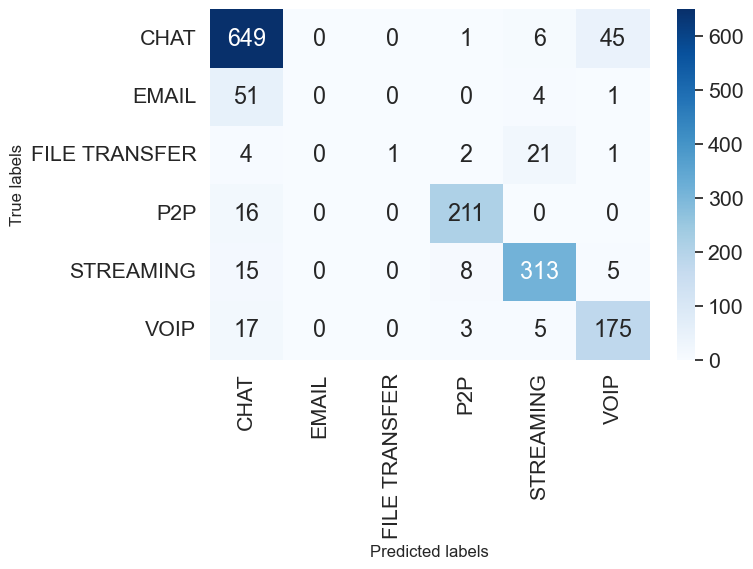

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define the labels for your classes
labels =['CHAT', 'EMAIL', 'FILE TRANSFER', 'P2P', 'STREAMING', 'VOIP']


#Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Increase the size of the plot
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels', fontsize=12)  # Increase fontsize and adjust label position
plt.ylabel('True labels', fontsize=12)  # Increase fontsize and adjust label position
#plt.title('Confusion Matrix')

# Adjust layout to ensure all labels are fully visible
plt.tight_layout()

# Save the plot as an image file
plt.savefig('cm_VPN-COMBINED.png')

# Show the plot
plt.show()

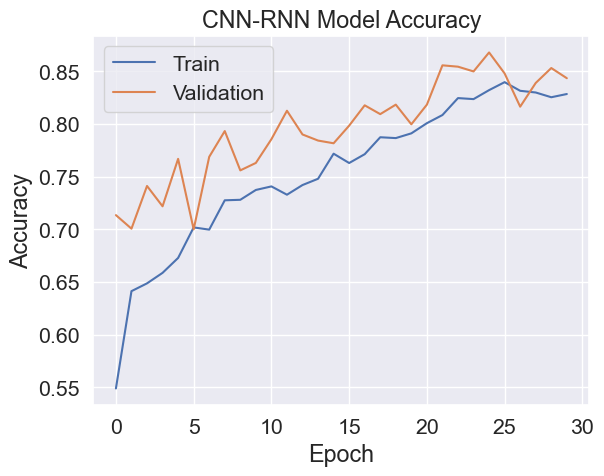

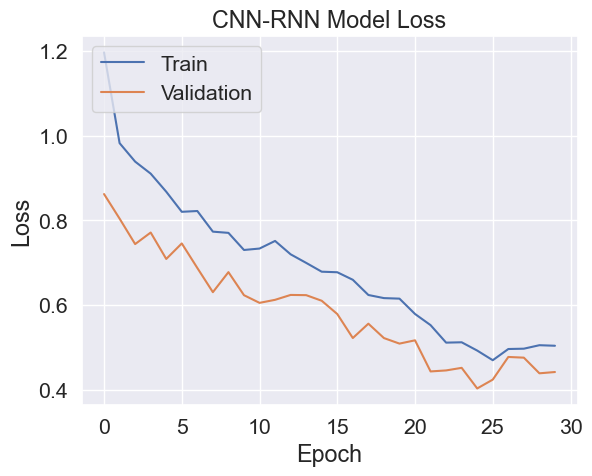

In [24]:
#Performance Metrics for RNN and CNN combined
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Train the model and capture the training history
#history = model.fit(X_train, y_train, epochs=3, batch_size=24, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN-RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN-RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [26]:
from sklearn.preprocessing import OneHotEncoder
# Concatenate y_train and y_test to get all unique categories
unique_categories = np.unique(np.concatenate((y_train, y_test)))

# Initialize the OneHotEncoder with unique categories
encoder = OneHotEncoder(categories=[unique_categories], sparse=False)

# Fit-transform on y_train and transform on y_test
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))
#y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))



C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


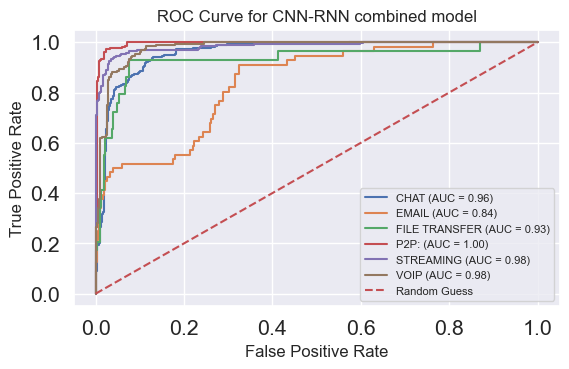


Average ROC AUC score across all classes: 0.9482
Overall ROC AUC Score (OvR): 0.95
Overall ROC AUC Score (OvO): 0.95


In [27]:
# Calculate ROC curve and AUC score for each class
roc_auc_scores = []

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score


import numpy as np

# Assuming y_test_one_hot and y_pred_proba_one_hot are the one-hot encoded ground truth labels and predicted probabilities, respectively

# Calculate the number of classes
num_classes = y_test_one_hot.shape[1]

label_names =['CHAT', 'EMAIL', 'FILE TRANSFER', 'P2P:', 'STREAMING', 'VOIP']


# Create a new figure for all classes with adjusted plot size
plt.figure(figsize=(6, 4))

# Plot ROC curve for each class
for i in range(num_classes):
    # Compute ROC curve and AUC for class i
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve for CNN-RNN combined model',fontsize=12)

# Add legend with reduced font size
plt.legend(prop={'size': 8})

plt.tight_layout()

# Save the plot as an image file
plt.savefig('roc_curve_VPN-combined.png')

# Show the plot
plt.show()


# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score across all classes: {average_roc_auc:.4f}")

# Calculate overall ROC AUC score using one-vs-rest (ovr) strategy
overall_roc_auc_ovr = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovr', average='macro')

# Calculate overall ROC AUC score using one-vs-one (ovo) strategy
overall_roc_auc_ovo = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovo', average='macro')

print(f'Overall ROC AUC Score (OvR): {overall_roc_auc_ovr:.2f}')
print(f'Overall ROC AUC Score (OvO): {overall_roc_auc_ovo:.2f}')

# RNN

In [19]:
import time
import psutil
import os

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define input shape based on your data
input_shape = (x_training_data.shape[1], 1)  # Shape of your input data

# Define the number of classes for the output
num_classes = 6  # Assuming you have 6 classes for the output


# get the start time
#start_wall_time = time.time()
#start_cpu_time = time.process_time()

# Create the RNN model
rnn_model = Sequential([
    SimpleRNN(units=64, return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64),
    Dropout(0.2),
    Dense(units=num_classes, activation='softmax')
])


# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
rnn_model.summary()



# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=75, batch_size=32,
                        validation_data=(X_test, y_test),callbacks=[early_stopping])

# get the end time
#end_wall_time = time.time()
#end_cpu_time = time.process_time()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 28, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 28, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,126 (82.52 KB)

 Trainable params: 21,126 (82.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.4664 - loss: 1.4273 - val_accuracy: 0.6171 - val_loss: 0.8911
Epoch 2/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.6186 - loss: 0.9817 - val_accuracy: 0.7059 - val_loss: 0.7638
Epoch 3/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6993 - loss: 0.8266 - val_accuracy: 0.7420 - val_loss: 0.6679
Epoch 4/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.7312 - loss: 0.7255 - val_accuracy: 0.7490 - val_loss: 0.6750
Epoch 5/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7334 - loss: 0.7185 - val_accuracy: 0.7304 - val_loss: 0.6712
Epoch 6/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7318 - loss: 0.6945 - val_accuracy: 0.7400 - val_loss: 0.6911
Epoch 7/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7414 - loss: 0.6645 - val_accuracy: 0.7503 - val_loss: 0.5950
Epoch 8/75
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7561 - loss: 0.6155 - val_acc

In [21]:
# Evaluate the RNN model
score = rnn_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.24076558649539948
Test accuracy: 0.9144144058227539


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       701
           1       0.72      0.84      0.78        56
           2       0.53      0.55      0.54        29
           3       1.00      0.89      0.94       227
           4       0.91      0.93      0.92       341
           5       0.82      0.94      0.88       200

    accuracy                           0.91      1554
   macro avg       0.82      0.85      0.83      1554
weighted avg       0.92      0.91      0.92      1554



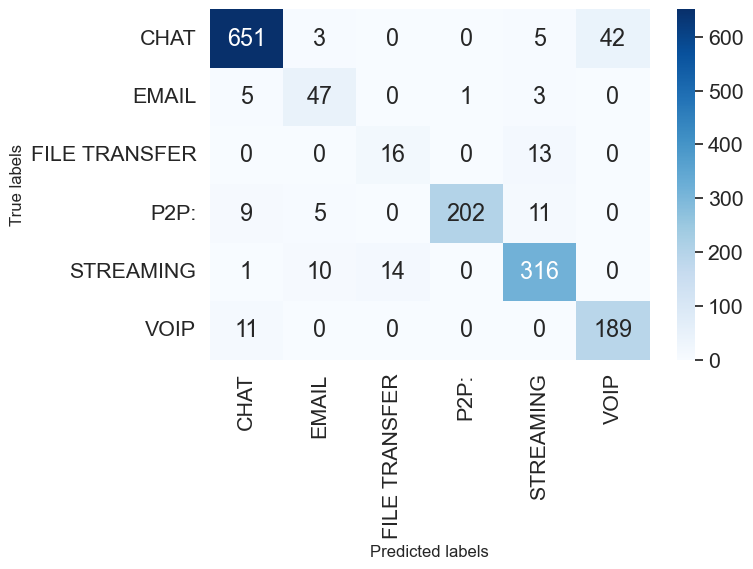

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Define the labels for your classes
labels =['CHAT', 'EMAIL', 'FILE TRANSFER', 'P2P:', 'STREAMING', 'VOIP']


#Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Increase the size of the plot
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels', fontsize=12)  # Increase fontsize and adjust label position
plt.ylabel('True labels', fontsize=12)  # Increase fontsize and adjust label position
#plt.title('Confusion Matrix')

# Adjust layout to ensure all labels are fully visible
plt.tight_layout()

# Save the plot as an image file
plt.savefig('cm_VPN-RNN.png')

# Show the plot
plt.show()

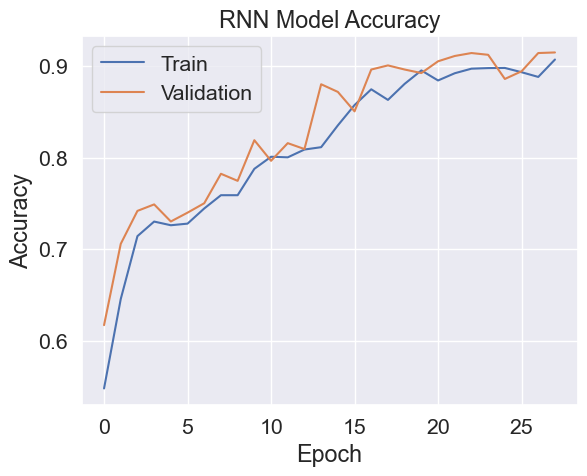

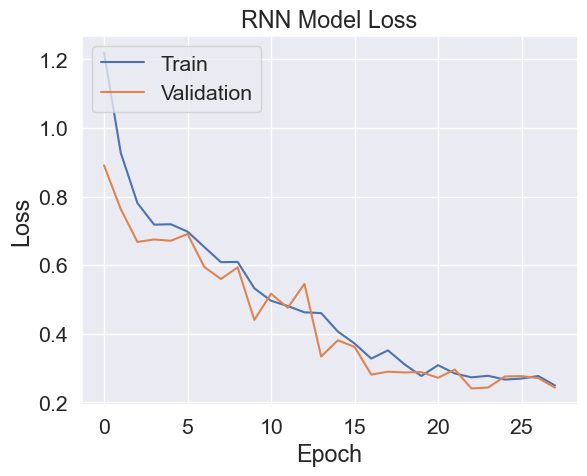

In [24]:
#Performance Metrics for RNN and CNN combined
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Train the model and capture the training history
#history = model.fit(X_train, y_train, epochs=3, batch_size=24, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate y_train and y_test to get all unique categories
unique_categories = np.unique(np.concatenate((y_train, y_test)))

# Initialize the OneHotEncoder with unique categories
encoder = OneHotEncoder(categories=[unique_categories], sparse=False)

# Fit-transform on y_train and transform on y_test
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))
#y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))



C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


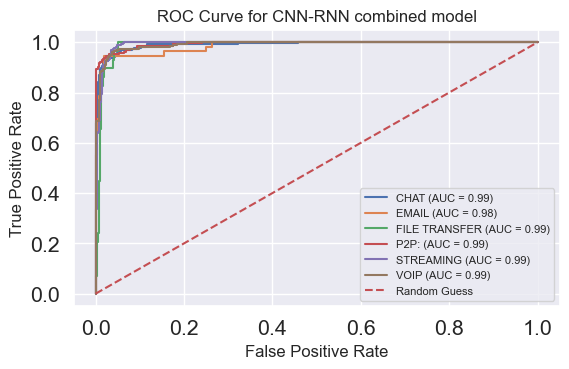


Average ROC AUC score across all classes: 0.9901
Overall ROC AUC Score (OvR): 0.99
Overall ROC AUC Score (OvO): 0.99


In [26]:
# Calculate ROC curve and AUC score for each class
roc_auc_scores = []

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score


import numpy as np

# Assuming y_test_one_hot and y_pred_proba_one_hot are the one-hot encoded ground truth labels and predicted probabilities, respectively

# Calculate the number of classes
num_classes = y_test_one_hot.shape[1]

label_names =['CHAT', 'EMAIL', 'FILE TRANSFER', 'P2P:', 'STREAMING', 'VOIP']


# Create a new figure for all classes with adjusted plot size
plt.figure(figsize=(6, 4))

# Plot ROC curve for each class
for i in range(num_classes):
    # Compute ROC curve and AUC for class i
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve for CNN-RNN combined model',fontsize=12)

# Add legend with reduced font size
plt.legend(prop={'size': 8})

plt.tight_layout()

# Save the plot as an image file
plt.savefig('roc_curve_VPN-combined.png')

# Show the plot
plt.show()


# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score across all classes: {average_roc_auc:.4f}")

# Calculate overall ROC AUC score using one-vs-rest (ovr) strategy
overall_roc_auc_ovr = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovr', average='macro')

# Calculate overall ROC AUC score using one-vs-one (ovo) strategy
overall_roc_auc_ovo = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovo', average='macro')

print(f'Overall ROC AUC Score (OvR): {overall_roc_auc_ovr:.2f}')
print(f'Overall ROC AUC Score (OvO): {overall_roc_auc_ovo:.2f}')

# Radial Basis Function

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC


import time
import psutil
import os

In [28]:
# get the start time
start_wall_time = time.time()
start_cpu_time = time.process_time()


# Define an RBF network pipeline
rbf_network = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=10),  # Adjust the number of clusters as needed
    SVC(kernel='rbf')
)

# Train the RBF network
rbf_network.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = rbf_network.predict(X_test)

# get the end time
end_wall_time = time.time()
end_cpu_time = time.process_time()

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.8873873873873874
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       701
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00        29
           3       0.86      0.81      0.84       227
           4       0.93      0.89      0.91       341
           5       0.98      0.98      0.98       200

    accuracy                           0.89      1554
   macro avg       0.60      0.61      0.61      1554
weighted avg       0.84      0.89      0.86      1554



C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


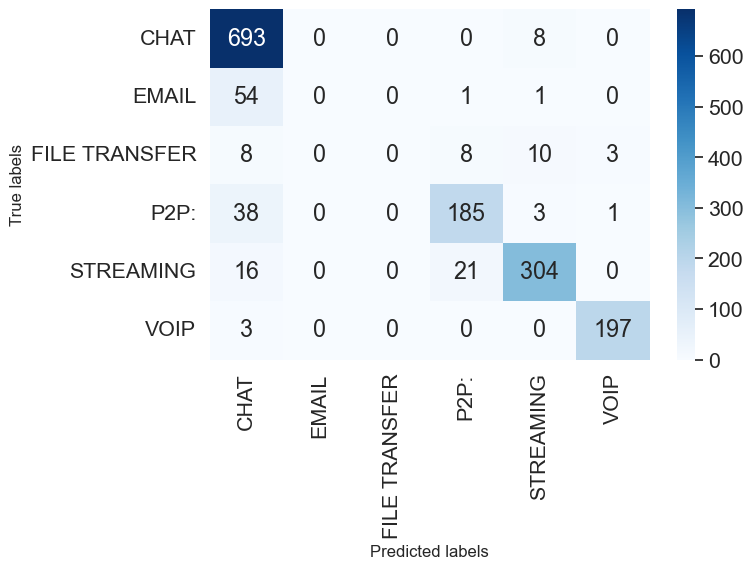

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the labels for your classes
labels =['CHAT', 'EMAIL', 'FILE TRANSFER', 'P2P:', 'STREAMING', 'VOIP']


conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Increase the size of the plot
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels', fontsize=12)  # Increase fontsize and adjust label position
plt.ylabel('True labels', fontsize=12)  # Increase fontsize and adjust label position
#plt.title('Confusion Matrix')

# Adjust layout to ensure all labels are fully visible
plt.tight_layout()

# Save the plot as an image file
plt.savefig('cm_vpn-RBF.png')

# Show the plot
plt.show()

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate y_train and y_test to get all unique categories
unique_categories = np.unique(np.concatenate((y_train, y_test)))

# Initialize the OneHotEncoder with unique categories
encoder = OneHotEncoder(categories=[unique_categories], sparse=False)

# Fit-transform on y_train and transform on y_test
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))
y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))
# Proceed with calculating ROC and AUC as before


C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


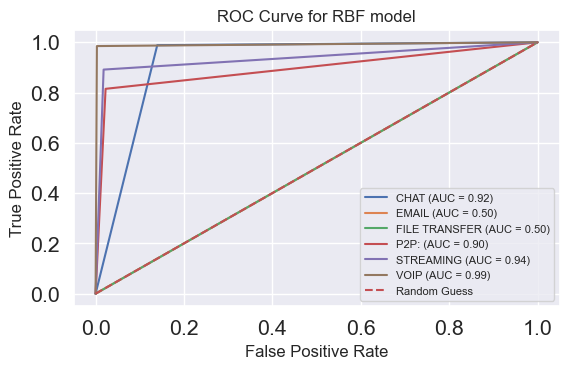


Average ROC AUC score across all classes: 0.7914
Overall ROC AUC Score (OvR): 0.79
Overall ROC AUC Score (OvO): 0.79


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calculate ROC curve and AUC score for each class
roc_auc_scores = []


# Calculate the number of classes
num_classes = y_test_one_hot.shape[1]

label_names = ['CHAT', 'EMAIL', 'FILE TRANSFER', 'P2P:', 'STREAMING', 'VOIP']

# Create a new figure for all classes with adjusted plot size
plt.figure(figsize=(6, 4))

# Plot ROC curve for each class
for i in range(num_classes):

    # Compute ROC curve and AUC for class i
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve for RBF model',fontsize=12)
plt.legend(prop={'size': 8})
plt.tight_layout()

# Save the plot as an image file
plt.savefig('roc_curve_VPN-RBF.png')
# Show the plot
plt.show()



# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score across all classes: {average_roc_auc:.4f}")

# Calculate overall ROC AUC score using one-vs-rest (ovr) strategy
overall_roc_auc_ovr = roc_auc_score(y_test_one_hot, y_pred_one_hot, multi_class='ovr', average='macro')

# Calculate overall ROC AUC score using one-vs-one (ovo) strategy
overall_roc_auc_ovo = roc_auc_score(y_test_one_hot, y_pred_one_hot, multi_class='ovo', average='macro')

print(f'Overall ROC AUC Score (OvR): {overall_roc_auc_ovr:.2f}')
print(f'Overall ROC AUC Score (OvO): {overall_roc_auc_ovo:.2f}')

# COMPARISON OF PERFORMANCE OF ALL THREE MODELS 

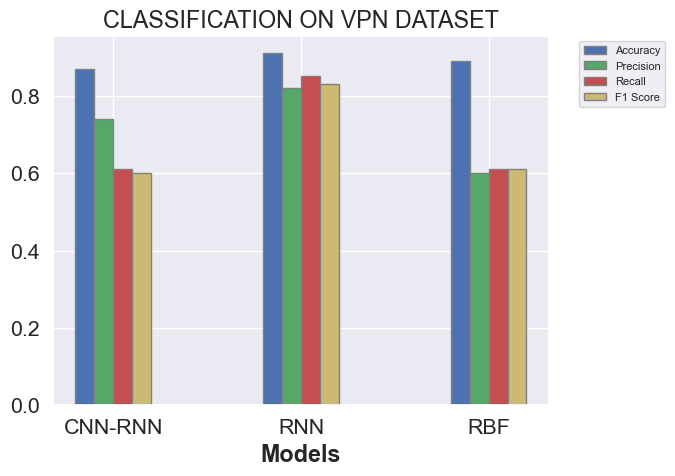

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their metrics
models = ['CNN-RNN', 'RNN', 'RBF']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
accuracy = [0.87,0.91,0.89]
precision = [0.74, 0.82, 0.60]
recall = [0.61, 0.85, 0.61]
f1_score = [0.60, 0.83, 0.61]

# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar graph
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(models))], models)

#Add a legend with reduced font size and placed outside the graph
plt.legend(prop={'size': 8}, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.title('CLASSIFICATION ON VPN DATASET')
plt.show()
